In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

n_cpu = 6

In [2]:
# DATASET_LINK = https://drive.google.com/file/d/1FGS_Bz91XKvQkey8LQ6TUE5Lr5ZmwhKe/view?usp=drive_link
# https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data

In [3]:
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weatherAUS.csv')
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
missing_values = df.isnull().sum()
total_rows = df.shape[0]
percentage = round(missing_values/total_rows*100,2)
unique_values = df.nunique()
summary_table = pd.DataFrame({
    'Missing Values': [f"{mv} ({pct:>5}%)" for mv, pct in zip(missing_values, percentage)],
    'Unique Values': unique_values,
    'Type': df.dtypes
})

print(f"Table shape: {df.shape}")
print(summary_table)

Table shape: (145460, 23)
               Missing Values  Unique Values     Type
Date               0 (  0.0%)           3436   object
Location           0 (  0.0%)             49   object
MinTemp         1485 ( 1.02%)            389  float64
MaxTemp         1261 ( 0.87%)            505  float64
Rainfall        3261 ( 2.24%)            681  float64
Evaporation    62790 (43.17%)            358  float64
Sunshine       69835 (48.01%)            145  float64
WindGustDir    10326 (  7.1%)             16   object
WindGustSpeed  10263 ( 7.06%)             67  float64
WindDir9am     10566 ( 7.26%)             16   object
WindDir3pm      4228 ( 2.91%)             16   object
WindSpeed9am    1767 ( 1.21%)             43  float64
WindSpeed3pm    3062 ( 2.11%)             44  float64
Humidity9am     2654 ( 1.82%)            101  float64
Humidity3pm     4507 (  3.1%)            101  float64
Pressure9am    15065 (10.36%)            546  float64
Pressure3pm    15028 (10.33%)            549  float64
Cl

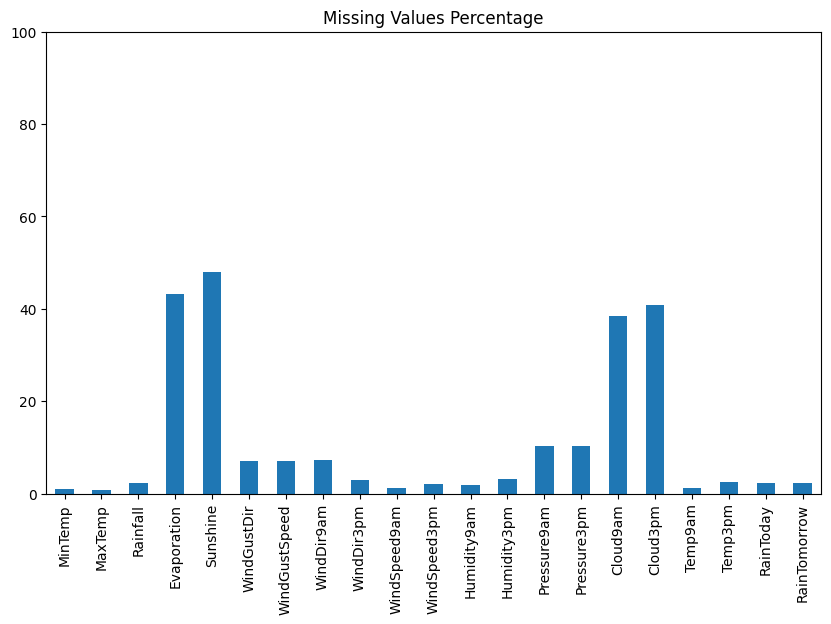

In [5]:
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage = missing_percentage[missing_percentage > 0]  # Filter only columns with missing values
missing_percentage.plot(kind='bar', figsize=(10, 6), title="Missing Values Percentage", ylim=(0, 100));

In [6]:
# Drop columns that have more than 30% missing values and are not suitable for imputation
columns_to_drop = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
df = df.drop(columns=columns_to_drop)

In [7]:
print("Remaining columns in the dataset:")
print(df.columns)

Remaining columns in the dataset:
Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [8]:
df.describe(include=['object']).T

,count,unique,top,freq
Date,145460,3436,2013-11-12,49
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838
RainToday,142199,2,No,110319
RainTomorrow,142193,2,No,110316


In [9]:
# Convert 'No' and 'Yes' values in 'RainToday' and 'RainTomorrow' columns to boolean (False/True)
df['RainToday'] = df['RainToday'].map({'No': False, 'Yes': True})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': False, 'Yes': True})

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0
Pressure9am,130395.0,1017.649940,7.106530,980.5,1012.9,1017.6,1022.4,1041.0
Pressure3pm,130432.0,1015.255889,7.037414,977.1,1010.4,1015.2,1020.0,1039.6


In [11]:
def na_values_heatmap(df):
  df_isnull = df.isnull()
  if not df_isnull.values.any():
    print("No missing values found.")
    return

  # Yellow indicates NA values
  rows_has_na_values = df[df_isnull.any(axis=1)]
  plt.figure(figsize=(8, 6))
  sns.heatmap(rows_has_na_values.isnull(), cbar=False, cmap='viridis', yticklabels=False)
  plt.title('Missing Value Heatmap for Rows with Only NaN Values')
  plt.show()

In [12]:
def missing_values(df):
  print(pd.DataFrame({
   'Columns': df.columns,
   'Missing Values': [f"{mv} ({round(mv/df.shape[0]*100, 2)}%)" for mv in df.isnull().sum()]
}).sort_values('Missing Values', ascending=False))

In [13]:
missing_values(df)

          Columns  Missing Values
12    Humidity3pm     4507 (3.1%)
8      WindDir3pm    4228 (2.91%)
16        Temp3pm    3609 (2.48%)
18   RainTomorrow    3267 (2.25%)
17      RainToday    3261 (2.24%)
4        Rainfall    3261 (2.24%)
10   WindSpeed3pm    3062 (2.11%)
11    Humidity9am    2654 (1.82%)
15        Temp9am    1767 (1.21%)
9    WindSpeed9am    1767 (1.21%)
13    Pressure9am  15065 (10.36%)
14    Pressure3pm  15028 (10.33%)
2         MinTemp    1485 (1.02%)
3         MaxTemp    1261 (0.87%)
7      WindDir9am   10566 (7.26%)
5     WindGustDir    10326 (7.1%)
6   WindGustSpeed   10263 (7.06%)
1        Location        0 (0.0%)
0            Date        0 (0.0%)


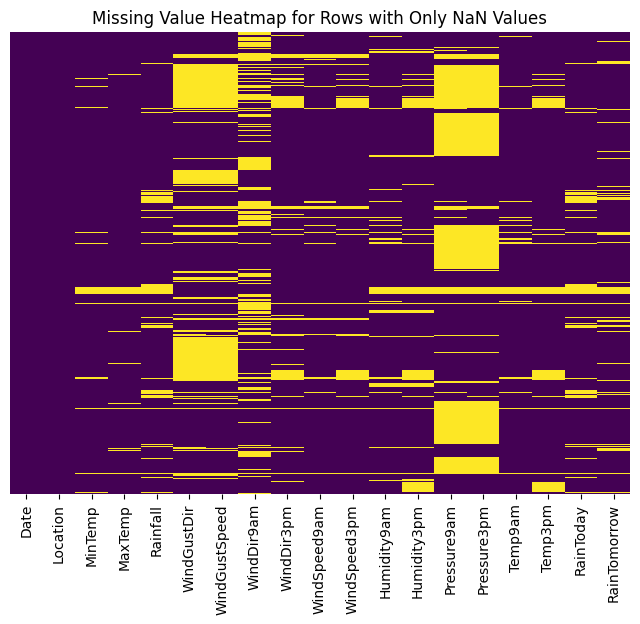

In [14]:
na_values_heatmap(df)

In [15]:
df[['Rainfall']].describe().T

,count,mean,std,min,25%,50%,75%,max
Rainfall,142199.0,2.360918,8.47806,0.0,0.0,0.0,0.8,371.0


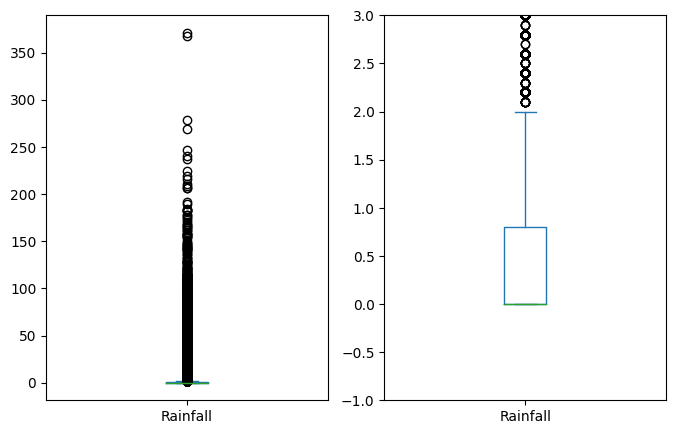

In [16]:
# Rainfalls are outlier
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
df['Rainfall'].plot(kind='box', ax=axes[0])
df['Rainfall'].plot(kind='box', ax=axes[1], ylim=(-1, 3));

In [17]:
# Fill rain today values with True if Rainfall > 2 (Q3 + 1.5 IQR), else False
df['RainToday'] = df['Rainfall'].apply(lambda x: True if x > 2 else False)
missing_values(df[['Rainfall', 'RainToday', 'RainTomorrow']])

        Columns Missing Values
2  RainTomorrow   3267 (2.25%)
0      Rainfall   3261 (2.24%)
1     RainToday       0 (0.0%)


In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df.loc[df['Rainfall'].isnull(), 'RainToday'].unique()

array([False])

In [20]:
df['Rainfall'] = df['Rainfall'].fillna(0)

In [21]:
missing_values(df[['Rainfall', 'RainToday', 'RainTomorrow']])

        Columns Missing Values
2  RainTomorrow   3267 (2.25%)
0      Rainfall       0 (0.0%)
1     RainToday       0 (0.0%)


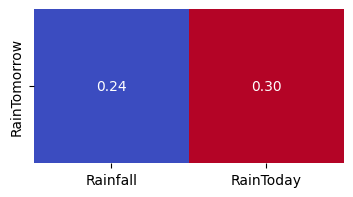

In [22]:
plt.figure(figsize=(4, 2))
sns.heatmap(df[['Rainfall', 'RainToday', 'RainTomorrow']].corr().iloc[2:,:2], fmt='.2f', annot=True, cmap='coolwarm', cbar=False);

In [23]:
### Recreating RainTomorrows with new RainToday values

# Select relevant columns and create a copy
df_copy = df[['Date', 'Location', 'RainToday', 'RainTomorrow']].copy()

df_copy['Date'] = pd.to_datetime(df_copy['Date'])
df_copy['NextDayDate'] = df_copy['Date'] + pd.Timedelta(days=1)

df_right = df_copy[['Date', 'Location', 'RainToday']]

merged= pd.merge(df_copy, df_right,
                 left_on=['NextDayDate', 'Location'],
                 right_on=['Date', 'Location'], how='left')

df_copy['RainTomorrow'] = merged['RainToday_y']
df_copy.head(15)

,Date,Location,RainToday,RainTomorrow,NextDayDate
0,2008-12-01,Albury,False,False,2008-12-02
1,2008-12-02,Albury,False,False,2008-12-03
2,2008-12-03,Albury,False,False,2008-12-04
3,2008-12-04,Albury,False,False,2008-12-05
4,2008-12-05,Albury,False,False,2008-12-06
5,2008-12-06,Albury,False,False,2008-12-07
6,2008-12-07,Albury,False,False,2008-12-08
7,2008-12-08,Albury,False,False,2008-12-09
8,2008-12-09,Albury,False,False,2008-12-10
9,2008-12-10,Albury,False,False,2008-12-11


In [24]:
df_merged = pd.merge(df.drop(columns=['RainTomorrow']), df_copy[['Date', 'Location', 'RainTomorrow']], on=['Date', 'Location'], how='left')
df_merged.head(15)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,False,False
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,False,False
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,False,False
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,False,False
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,False,False
5,2008-12-06,Albury,14.6,29.7,0.2,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,False,False
6,2008-12-07,Albury,14.3,25.0,0.0,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,False,False
7,2008-12-08,Albury,7.7,26.7,0.0,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,False,False
8,2008-12-09,Albury,9.7,31.9,0.0,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,False,False
9,2008-12-10,Albury,13.1,30.1,1.4,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,20.1,28.2,False,False


In [25]:
# Validation of RainTomorrows
missing_values(df_merged[['Rainfall', 'RainToday', 'RainTomorrow']])

        Columns Missing Values
2  RainTomorrow    192 (0.13%)
0      Rainfall       0 (0.0%)
1     RainToday       0 (0.0%)


In [26]:
df_merged.loc[df_merged['Rainfall'].isnull(), 'RainToday'].unique()

array([], dtype=bool)

In [27]:
df_merged['Rainfall'] = df_merged['Rainfall'].fillna(0)

In [28]:
missing_values(df_merged[['Rainfall', 'RainToday', 'RainTomorrow']])

        Columns Missing Values
2  RainTomorrow    192 (0.13%)
0      Rainfall       0 (0.0%)
1     RainToday       0 (0.0%)


In [29]:
df.shape

(145460, 19)

In [30]:
df_merged = df_merged[df_merged['RainTomorrow'].notna()]

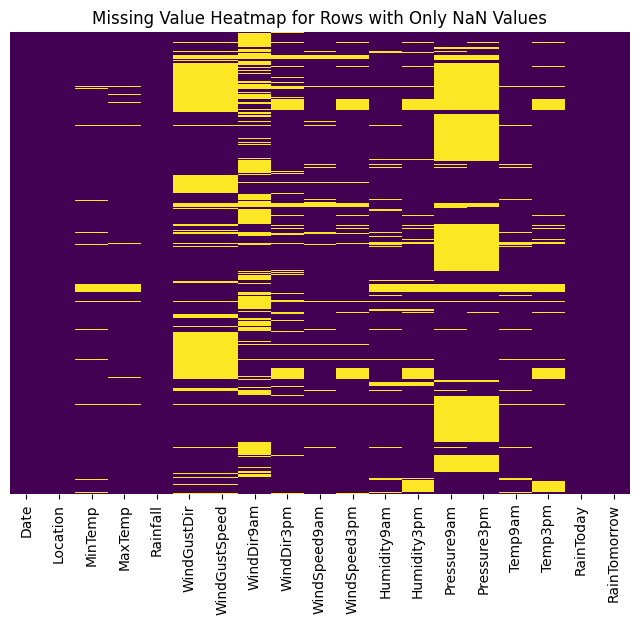

In [31]:
na_values_heatmap(df_merged)

In [32]:
# Sort values by 'Location' and 'Date'
df_merged.sort_values(by=['Location', 'Date'], inplace=True)

# List of columns to apply bfill
columns_to_fill = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Temp9am', 'Temp3pm',
    'Humidity9am', 'Humidity3pm', 'WindSpeed9am', 'WindSpeed3pm',
    'Pressure9am', 'Pressure3pm'
]

# Loop through the columns and apply bfill and ffill within each Location group
for col in columns_to_fill:
    df_merged[col] = df_merged.groupby('Location')[col].ffill()
    df_merged[col] = df_merged.groupby('Location')[col].bfill()

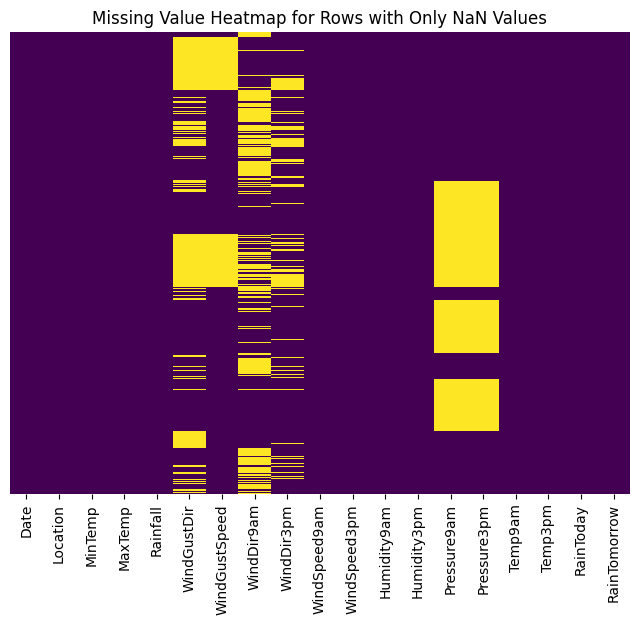

In [33]:
na_values_heatmap(df_merged)

In [34]:
# Filter rows where either 'Pressure9am' or 'Pressure3pm' is NaN and get the count of missing pressure values per location
pressure_na_counts = df_merged.loc[
    df_merged[['Pressure9am', 'Pressure3pm']].isnull().any(axis=1),
    'Location'].value_counts()

# total record count per location
specific_loc_counts = df_merged['Location'].value_counts()

# Merge the counts
pd.merge(
    pressure_na_counts,
    specific_loc_counts,
    left_index=True,
    right_index=True,
    how='inner',
    suffixes=('_Missing', '_Total')
)

,count_Missing,count_Total
Location,,
MountGinini,3036,3036
Newcastle,3035,3035
Penrith,3034,3034
SalmonGums,2996,2996


In [35]:
df_locations_dropped = df_merged[~df_merged['Location'].isin(['Penrith', 'Newcastle', 'SalmonGums', 'MountGinini'])]

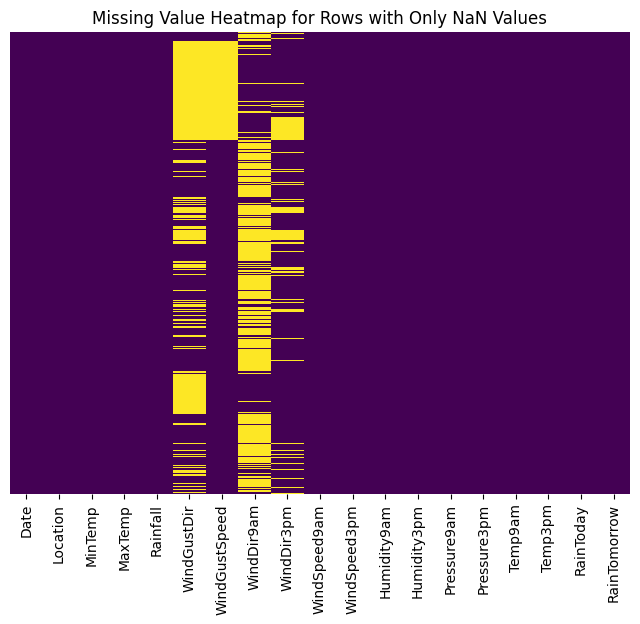

In [36]:
na_values_heatmap(df_locations_dropped)

In [37]:
# Filter rows where 'WindGustSpeed' is NaN and get the count of missing values per location
wind_speed_na_counts = df_locations_dropped.loc[
    df_locations_dropped['WindGustSpeed'].isnull(),
    'Location'].value_counts()

# Merge with total record counts
wind_speed_summary = pd.merge(
    wind_speed_na_counts,
    specific_loc_counts,
    left_index=True,
    right_index=True,
    how='inner',
    suffixes=('_Missing', '_Total')
)

# Print the result
print(wind_speed_summary)

          count_Missing  count_Total
Location                            
Albany             3036         3036


In [38]:
df_locations_dropped = df_locations_dropped[df_locations_dropped['Location'] != 'Albany']

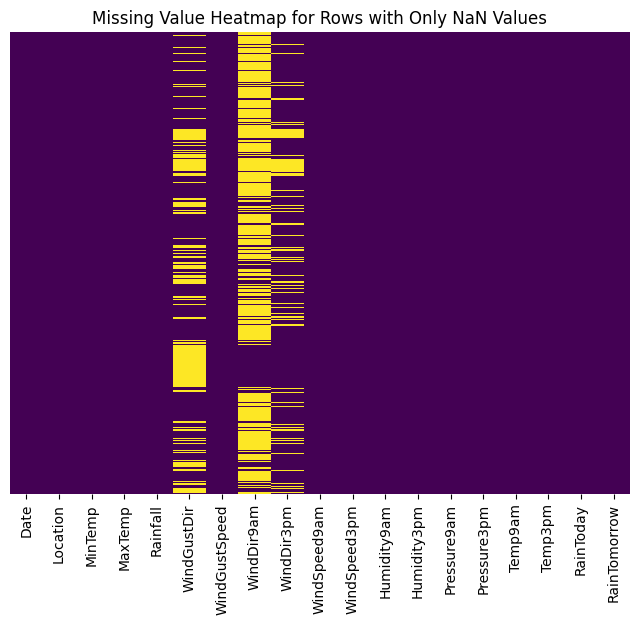

In [39]:
na_values_heatmap(df_locations_dropped)

In [40]:
# Drop rows with NA values in the specified columns
windir_data_na_dropped = df_locations_dropped.dropna(subset=['WindGustDir', 'WindDir9am', 'WindDir3pm'])

# Apply pd.get_dummies to the categorical columns
windir_dummies = pd.get_dummies(windir_data_na_dropped[['WindGustDir', 'WindDir9am', 'WindDir3pm']])
windir_dummies['RainTomorrow'] = windir_data_na_dropped['RainTomorrow']

# Compute the correlation matrix
corr_matrix = windir_dummies.corr()

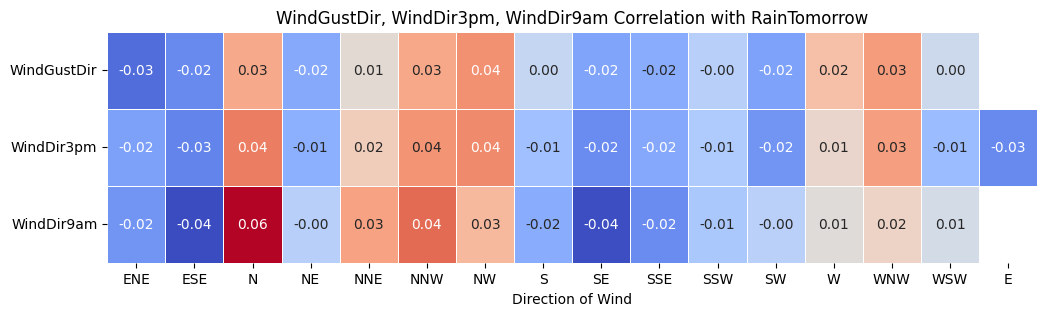

In [41]:
# Extract the correlation for WindGustDir
windGustDir = corr_matrix.iloc[-1:, 1:16]
windGustDir = windGustDir.rename(index={'RainTomorrow': 'WindGustDir'})
windGustDir = windGustDir.rename(columns={c: c.split('_')[1] for c in windGustDir.columns})

# Extract the correlation for WindDir_9am
windDir_9am = corr_matrix.iloc[-1:, 17:32]
windDir_9am = windDir_9am.rename(index={'RainTomorrow': 'WindDir9am'})
windDir_9am = windDir_9am.rename(columns={c: c.split('_')[1] for c in windDir_9am.columns})

# Extract the correlation for WindDir_3pm
windDir_3pm = corr_matrix.iloc[-1:, 32:-1]
windDir_3pm = windDir_3pm.rename(index={'RainTomorrow': 'WindDir3pm'})
windDir_3pm = windDir_3pm.rename(columns={c: c.split('_')[1] for c in windDir_3pm.columns})

# Concatenate the three DataFrames along axis 0
combined_data = pd.concat([windGustDir, windDir_3pm, windDir_9am], axis=0)

plt.figure(figsize=(12, 3))
sns.heatmap(combined_data, annot=True, cmap='coolwarm', cbar=False, fmt='.2f', linewidths=0.5)
plt.title('WindGustDir, WindDir3pm, WindDir9am Correlation with RainTomorrow')
plt.xlabel('Direction of Wind')
plt.show()

In [42]:
df_windir_cols_dropped = df_locations_dropped.drop(columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'])
df_locations_dropped.shape, df_windir_cols_dropped.shape

((130131, 19), (130131, 16))

In [43]:
na_values_heatmap(df_windir_cols_dropped)

No missing values found.


In [44]:
df_windir_cols_dropped.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
WindGustSpeed           float64
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Temp9am                 float64
Temp3pm                 float64
RainToday                  bool
RainTomorrow             object
dtype: object

In [45]:
df_windir_cols_dropped['RainTomorrow'] = df_windir_cols_dropped['RainTomorrow'].astype(bool)

In [46]:
df_windir_cols_dropped.describe(include=['object','bool']).T

,count,unique,top,freq
Location,130131,44,Canberra,3432
RainToday,130131,2,False,107400
RainTomorrow,130131,2,False,107411


In [47]:
df_windir_cols_dropped.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,130131,2013-04-05 20:06:23.429006080,2007-11-01 00:00:00,2011-01-10 00:00:00,2013-06-07 00:00:00,2015-06-16 00:00:00,2017-06-24 00:00:00,NaN
MinTemp,130131.0,12.416376,-8.2,7.8,12.2,17.1,33.9,6.373504
MaxTemp,130131.0,23.484486,2.6,18.1,22.9,28.5,48.1,6.979567
Rainfall,130131.0,2.306808,0.0,0.0,0.0,0.6,371.0,8.483072
WindGustSpeed,130131.0,40.194965,6.0,31.0,39.0,48.0,135.0,13.459703
WindSpeed9am,130131.0,14.352453,0.0,7.0,13.0,20.0,87.0,8.809087
WindSpeed3pm,130131.0,19.033382,0.0,13.0,19.0,24.0,87.0,8.66279
Humidity9am,130131.0,68.416434,0.0,57.0,69.0,83.0,100.0,19.184638
Humidity3pm,130131.0,50.959718,0.0,36.0,52.0,65.0,100.0,20.681
Pressure9am,130131.0,1017.611293,980.5,1013.0,1017.6,1022.3,1041.0,7.053938


In [48]:
df_windir_cols_dropped

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
96320,2008-07-01,Adelaide,8.8,15.7,5.0,48.0,13.0,15.0,92.0,67.0,1017.4,1017.7,13.5,14.9,True,False
96321,2008-07-02,Adelaide,12.7,15.8,0.8,35.0,13.0,15.0,75.0,52.0,1022.4,1022.6,13.7,15.5,False,False
96322,2008-07-03,Adelaide,6.2,15.1,0.0,20.0,2.0,11.0,81.0,56.0,1027.8,1026.5,9.3,13.9,False,False
96323,2008-07-04,Adelaide,5.3,15.9,0.0,30.0,6.0,13.0,71.0,46.0,1028.7,1025.6,10.2,15.3,False,False
96324,2008-07-05,Adelaide,9.8,15.4,0.0,30.0,9.0,9.0,56.0,67.0,1023.6,1020.2,11.3,13.8,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108565,2017-06-20,Woomera,5.6,19.7,0.0,20.0,9.0,7.0,61.0,28.0,1028.1,1025.9,11.1,19.2,False,False
108566,2017-06-21,Woomera,5.8,19.9,0.0,22.0,11.0,9.0,52.0,22.0,1027.9,1025.1,11.1,19.1,False,False
108567,2017-06-22,Woomera,7.8,19.0,0.0,31.0,13.0,17.0,48.0,37.0,1025.8,1022.2,11.1,18.0,False,False
108568,2017-06-23,Woomera,8.0,22.5,0.0,33.0,13.0,15.0,57.0,31.0,1021.0,1018.2,11.5,21.5,False,False


In [49]:
clean_df = df_windir_cols_dropped.copy()
clean_df.to_csv('clean_AUS_weather_data.csv', index=False)

In [50]:
numeric_cols = clean_df.select_dtypes(include=['float64', 'int64','bool']).columns

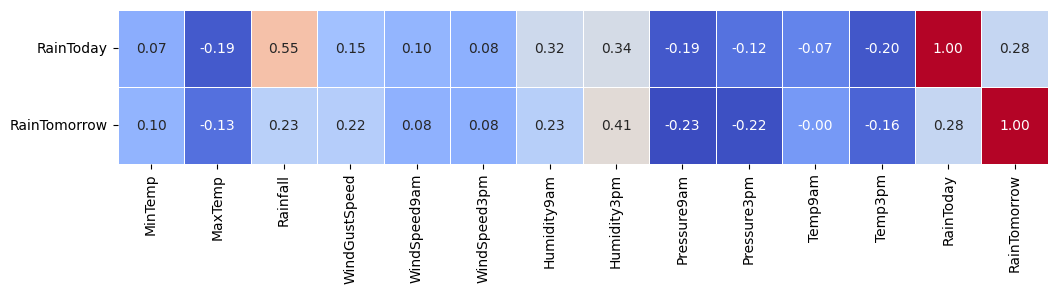

In [51]:
plt.figure(figsize=(12, 2))
sns.heatmap(clean_df[numeric_cols].corr().loc[['RainToday','RainTomorrow'],:], annot=True, cmap='coolwarm', cbar=False, fmt='.2f', linewidths=0.5);

In [52]:
# sns.pairplot(clean_df[numeric_cols], diag_kind='kde', kind='scatter', corner=False);

In [53]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Train - Test split ensuring both set has at least one sample from every unique value of the Location categorical variable
for train_index, test_index in splitter.split(clean_df, clean_df["Location"]):
    train_set = clean_df.iloc[train_index]
    test_set = clean_df.iloc[test_index]

# Save to CSV
# train_set.to_csv("clean_weatherAUS_train_data.csv", index=False)
# test_set.to_csv("clean_weatherAUS_test_data.csv", index=False)

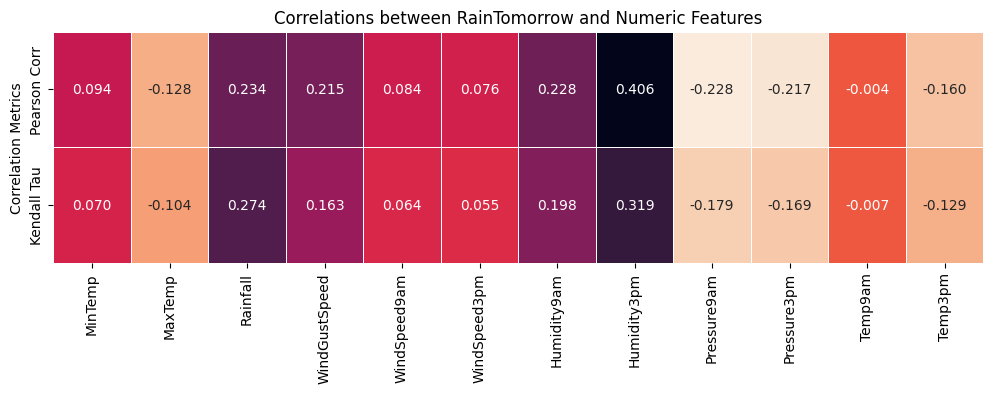

In [54]:
# Initialize a dictionary to store Kendall Tau correlations
kendall_results = {}

# Perform Kendall Tau correlation for each numeric column
for col in numeric_cols:
    tau_stat, tau_p = stats.kendalltau(train_set['RainTomorrow'], train_set[col])  # Perform Kendall Tau
    kendall_results[col] = tau_stat  # Store the Kendall Tau correlation coefficient

# Convert Kendall Tau results into a DataFrame
kendall_df = pd.DataFrame(list(kendall_results.items()), columns=['Numeric Column', 'Kendall Tau'])

# Reshape the Kendall Tau correlations into a DataFrame suitable for heatmap
kendall_matrix = kendall_df.set_index('Numeric Column').T.iloc[:,:-2]

# Pearson Correlations
pearson_corr = train_set[numeric_cols].corr().iloc[-1:,:-2]

# combine correlation matrices
pearson_corr = pearson_corr.rename(index={'RainTomorrow': 'Pearson Corr'})
combined_matrix = pd.concat([pearson_corr, kendall_matrix], axis=0)

# Create the heatmap for the combined matrix
plt.figure(figsize=(12, 3))
sns.heatmap(combined_matrix, annot=True, cmap='rocket_r', fmt='.3f', cbar=False, linewidths=0.5)

# Add titles and labels
plt.title('Correlations between RainTomorrow and Numeric Features')
plt.ylabel('Correlation Metrics')
plt.show()

In [55]:
# inputs [numericals cols]
# output [RainTomorrow : Binary value]
# Models: KNN, Logistic Regression, SVM, Random Forest, XGBoost

In [56]:
train_set = train_set.drop(columns=['Date','Location'])
test_set = test_set.drop(columns=['Date','Location'])

In [57]:
X_train = train_set.drop(columns=['RainTomorrow'])
y_train = train_set['RainTomorrow']
X_test = test_set.drop(columns=['RainTomorrow'])
y_test = test_set['RainTomorrow']

In [58]:
from sklearn.preprocessing import StandardScaler

# Preprocess numeric columns: scale them
numeric_cols = X_train.select_dtypes(include=['float64', 'int64', 'bool']).columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [59]:
# Concatenate encoded features with numeric features
X_train_final = X_train[numeric_cols].values
X_test_final  = X_test[numeric_cols].values

In [60]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold, ParameterGrid
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [61]:
def evaluate_model_performance(model, model_name, model_params, X_train, y_train, cv=5):
    # Perform cross-validation predictions
    kf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    y_pred = cross_val_predict(model, X_train, y_train, cv=kf)

    # Compute performance metrics
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)

    # Prepare results dictionary
    results = {
        'model': model_name,
        'params': model_params,
        'precision': precision,
        'recall': recall,
        'accuracy': accuracy,
        'f1-score': f1
    }

    return results

In [62]:
try:
  results = pd.read_csv('results.csv')
except Exception:
  results = pd.DataFrame(columns=['model', 'params', 'precision', 'recall', 'accuracy', 'f1-score'])

K-Nearest Neighbors (KNN)

In [63]:
from sklearn.neighbors import KNeighborsClassifier

params_knn = {
    'n_neighbors': [5, 10, 50, 100],
    'weights': ['uniform', 'distance'],
}

param_knn_combinations = list(ParameterGrid(params_knn))
model_name_knn = 'KNN'

for model_params in param_knn_combinations:
    if results[(results['model'] == model_name_knn) & (results['params'] == str(model_params))].shape[0] > 0:
        continue

    try:
      model = KNeighborsClassifier(**model_params, n_jobs=n_cpu)
      r = evaluate_model_performance(
          model,
          model_name_knn,
          str(model_params),
          X_train_final, y_train)
    except ValueError as e:
      print(e)
      continue

    new_results = pd.DataFrame([r])
    results = pd.concat([results, new_results], ignore_index=True)
    results.to_csv('results.csv', index=False)

In [64]:
results[results['model'] == model_name_knn].sort_values(by=['f1-score'], ascending=False)

,model,params,precision,recall,accuracy,f1-score
3,KNN,"{'n_neighbors': 10, 'weights': 'distance'}",0.677856,0.403555,0.862849,0.505917
1,KNN,"{'n_neighbors': 5, 'weights': 'distance'}",0.632556,0.419399,0.856586,0.504382
0,KNN,"{'n_neighbors': 5, 'weights': 'uniform'}",0.632317,0.418019,0.856442,0.503307
5,KNN,"{'n_neighbors': 50, 'weights': 'distance'}",0.736726,0.367671,0.867114,0.490535
4,KNN,"{'n_neighbors': 50, 'weights': 'uniform'}",0.743881,0.354036,0.866393,0.479746
7,KNN,"{'n_neighbors': 100, 'weights': 'distance'}",0.748425,0.347521,0.866143,0.474647
2,KNN,"{'n_neighbors': 10, 'weights': 'uniform'}",0.710134,0.349343,0.861975,0.468307
6,KNN,"{'n_neighbors': 100, 'weights': 'uniform'}",0.752183,0.337639,0.865394,0.466070


Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

params_log_res = {
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'saga'],
    'C': [0.01 ,0.1, 1, 10],
    'fit_intercept': [True, False]
}

param_log_res_combinations = list(ParameterGrid(params_log_res))
model_name_log_res = 'Logistic Regression'

for model_params in param_log_res_combinations:
    if results[(results['model'] == model_name_log_res) & (results['params'] == str(model_params))].shape[0] > 0:
        continue

    try:
      model = LogisticRegression(**model_params, n_jobs=n_cpu)
      r = evaluate_model_performance(
          model,
          model_name_log_res,
          str(model_params),
          X_train_final, y_train)
    except ValueError as e:
      print(e)
      continue

    new_results = pd.DataFrame([r])
    results = pd.concat([results, new_results], ignore_index=True)
    results.to_csv('results.csv', index=False)


Solver lbfgs supports only 'l2' or None penalties, got l1 penalty.
Solver newton-cg supports only 'l2' or None penalties, got l1 penalty.
Solver newton-cholesky supports only 'l2' or None penalties, got l1 penalty.
Solver lbfgs supports only 'l2' or None penalties, got l1 penalty.
Solver newton-cg supports only 'l2' or None penalties, got l1 penalty.
Solver newton-cholesky supports only 'l2' or None penalties, got l1 penalty.
Solver lbfgs supports only 'l2' or None penalties, got l1 penalty.
Solver newton-cg supports only 'l2' or None penalties, got l1 penalty.
Solver newton-cholesky supports only 'l2' or None penalties, got l1 penalty.
Solver lbfgs supports only 'l2' or None penalties, got l1 penalty.
Solver newton-cg supports only 'l2' or None penalties, got l1 penalty.
Solver newton-cholesky supports only 'l2' or None penalties, got l1 penalty.
Solver lbfgs supports only 'l2' or None penalties, got l1 penalty.
Solver newton-cg supports only 'l2' or None penalties, got l1 penalty.
So

In [66]:
results[results['model'] == model_name_log_res].sort_values(by=['f1-score'], ascending=False).head(25)

,model,params,precision,recall,accuracy,f1-score
40,Logistic Regression,"{'C': 1, 'fit_intercept': True, 'penalty': 'l2...",0.705463,0.409904,0.867546,0.518524
41,Logistic Regression,"{'C': 1, 'fit_intercept': True, 'penalty': 'l2...",0.705463,0.409904,0.867546,0.518524
42,Logistic Regression,"{'C': 1, 'fit_intercept': True, 'penalty': 'l2...",0.705463,0.409904,0.867546,0.518524
39,Logistic Regression,"{'C': 1, 'fit_intercept': True, 'penalty': 'l2...",0.705396,0.409904,0.867536,0.518506
38,Logistic Regression,"{'C': 1, 'fit_intercept': True, 'penalty': 'l2...",0.705435,0.409849,0.867536,0.518472
37,Logistic Regression,"{'C': 1, 'fit_intercept': True, 'penalty': 'l1...",0.705368,0.409849,0.867527,0.518454
36,Logistic Regression,"{'C': 1, 'fit_intercept': True, 'penalty': 'l1...",0.705301,0.409849,0.867517,0.518436
50,Logistic Regression,"{'C': 10, 'fit_intercept': True, 'penalty': 'l...",0.705301,0.409849,0.867517,0.518436
52,Logistic Regression,"{'C': 10, 'fit_intercept': True, 'penalty': 'l...",0.705273,0.409794,0.867507,0.518384
55,Logistic Regression,"{'C': 10, 'fit_intercept': True, 'penalty': 'l...",0.705273,0.409794,0.867507,0.518384


Random Forest (RF)

In [67]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {
    'n_estimators': [50, 100, 500],
    'min_samples_split': [5, 10, 40],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced'],
}

param_rf_combinations = list(ParameterGrid(params_rf))

model_name_rf = 'Random Forest'

for model_params in param_rf_combinations:
    # Check if this combination has already been evaluated
    if results[(results['model'] == model_name_rf) & (results['params'] == str(model_params))].shape[0] > 0:
        continue

    try:
      model = RandomForestClassifier(**model_params, n_jobs=n_cpu)
      r = evaluate_model_performance(
          model,
          model_name_rf,
          str(model_params),
          X_train_final, y_train)
    except ValueError as e:
      print(e)
      continue

    new_results = pd.DataFrame([r])
    results = pd.concat([results, new_results], ignore_index=True)
    results.to_csv('results.csv', index=False)


In [68]:
results[results['model'] == model_name_rf].sort_values(by=['f1-score'], ascending=False).head(25)

,model,params,precision,recall,accuracy,f1-score
168,Random Forest,"{'class_weight': 'balanced', 'max_features': '...",0.600132,0.601192,0.860908,0.600662
141,Random Forest,"{'class_weight': 'balanced', 'max_features': '...",0.600055,0.600420,0.860841,0.600237
165,Random Forest,"{'class_weight': 'balanced', 'max_features': '...",0.599018,0.599647,0.860495,0.599332
137,Random Forest,"{'class_weight': 'balanced', 'max_features': '...",0.597814,0.600751,0.860207,0.599279
138,Random Forest,"{'class_weight': 'balanced', 'max_features': '...",0.599238,0.599205,0.860534,0.599222
153,Random Forest,"{'class_weight': 'balanced', 'max_features': '...",0.538533,0.674727,0.842801,0.598986
140,Random Forest,"{'class_weight': 'balanced', 'max_features': '...",0.597146,0.600640,0.860005,0.598888
164,Random Forest,"{'class_weight': 'balanced', 'max_features': '...",0.596526,0.600972,0.859842,0.598740
167,Random Forest,"{'class_weight': 'balanced', 'max_features': '...",0.597003,0.600364,0.859948,0.598679
126,Random Forest,"{'class_weight': 'balanced', 'max_features': '...",0.538309,0.673347,0.842677,0.598303


Extreme Gradient Boosting (XGBoost)

In [69]:
from xgboost import XGBClassifier

params_xgb = {
    'n_estimators': [50, 100, 500],
    'max_depth': [3, 6, 9],
    'colsample_bytree': [0.4, 0.6, 0.8],
    'learning_rate': [0.1, 0.3],
    'subsample' : [0.7, 1],
    'min_child_weight': [1, 5],
    'scale_pos_weight': [1, 2],
}

param_xgb_combinations = list(ParameterGrid(params_xgb))

model_name_xgb = 'XGBoost'

for model_params in param_xgb_combinations:
    # Check if this combination has already been evaluated
    if results[(results['model'] == model_name_xgb) & (results['params'] == str(model_params))].shape[0] > 0:
        continue

    try:
      model = XGBClassifier(**model_params, n_threads=n_cpu)
      r = evaluate_model_performance(
          model,
          model_name_xgb,
          str(model_params),
          X_train_final, y_train)
    except ValueError as e:
      print(e)
      continue

    new_results = pd.DataFrame([r])
    results = pd.concat([results, new_results], ignore_index=True)
    results.to_csv('results.csv', index=False)


In [70]:
results[results['model'] == model_name_xgb].sort_values(by=['f1-score'], ascending=False).head(25)

,model,params,precision,recall,accuracy,f1-score
502,XGBoost,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.612665,0.590206,0.863771,0.601226
490,XGBoost,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.612750,0.589544,0.863752,0.600923
358,XGBoost,"{'colsample_bytree': 0.6, 'learning_rate': 0.1...",0.616641,0.585459,0.864539,0.600646
470,XGBoost,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.607589,0.593132,0.862551,0.600274
326,XGBoost,"{'colsample_bytree': 0.6, 'learning_rate': 0.1...",0.609892,0.590869,0.863050,0.600230
338,XGBoost,"{'colsample_bytree': 0.6, 'learning_rate': 0.1...",0.609908,0.590648,0.863041,0.600123
267,XGBoost,"{'colsample_bytree': 0.4, 'learning_rate': 0.3...",0.607145,0.592967,0.862416,0.599972
482,XGBoost,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.606591,0.593464,0.862292,0.599955
503,XGBoost,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.612254,0.588053,0.863521,0.599910
491,XGBoost,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.613203,0.587170,0.863723,0.599904


Selection of better models for each algorithm

In [71]:
temp_results = results.copy()
temp_results['recall'] = np.round(temp_results['recall'], 3)
temp_results['f1-score'] = np.round(temp_results['f1-score'], 3)
temp_results['precision'] = np.round(temp_results['precision'], 3)
temp_results['accuracy'] = np.round(temp_results['accuracy'], 3)

top_models = (
    temp_results.sort_values(by=['f1-score','recall'], ascending=[False, False])
    .groupby('model')  # Group by model
    .first()  # Get the top row for each group
    .reset_index()  # Reset index for clean access
)

top_models

,model,params,precision,recall,accuracy,f1-score
0,KNN,"{'n_neighbors': 10, 'weights': 'distance'}",0.678,0.404,0.863,0.506
1,Logistic Regression,"{'C': 1, 'fit_intercept': True, 'penalty': 'l2...",0.705,0.410,0.868,0.519
2,Random Forest,"{'class_weight': 'balanced', 'max_features': '...",0.600,0.601,0.861,0.601
3,XGBoost,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.613,0.590,0.864,0.601


Comparing Test Error Reults

In [72]:
# metric scores on generalized data
test_scores = pd.DataFrame()

In [73]:
# KNN
knn_model_params = eval(top_models.loc[top_models.model == 'KNN', 'params'].iloc[0])
knn_model = KNeighborsClassifier(**knn_model_params, n_jobs=n_cpu)

# Train the KNN model
knn_model.fit(X_train_final, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test_final)

# Compute metrics
knn_f1 = f1_score(y_test, y_pred)
knn_accuracy = accuracy_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)

# Append results to the DataFrame
r = pd.DataFrame([{
    'model': 'KNN',
    'params': str(knn_model_params),
    'f1_score': knn_f1,
    'accuracy': knn_accuracy,
    'recall': knn_recall,
    'precision': knn_precision
}])

test_scores = pd.concat([test_scores, r], ignore_index=True)

In [74]:
# Logistic Regression
log_res_model_params = eval(top_models.loc[top_models.model == 'Logistic Regression', 'params'].iloc[0])
log_res_model = LogisticRegression(**log_res_model_params, n_jobs=n_cpu)

# Train the log_res model
log_res_model.fit(X_train_final, y_train)

# Predict on the test set
y_pred = log_res_model.predict(X_test_final)

# Compute metrics
log_res_f1 = f1_score(y_test, y_pred)
log_res_accuracy = accuracy_score(y_test, y_pred)
log_res_recall = recall_score(y_test, y_pred)
log_res_precision = precision_score(y_test, y_pred)

# Append results to the DataFrame
r = pd.DataFrame([{
    'model': 'Logistic Regression',
    'params': str(log_res_model_params),
    'f1_score': log_res_f1,
    'accuracy': log_res_accuracy,
    'recall': log_res_recall,
    'precision': log_res_precision
}])

test_scores = pd.concat([test_scores, r], ignore_index=True)

In [75]:
# Random Forest
rf_model_params = eval(top_models.loc[top_models.model == 'Random Forest', 'params'].iloc[0])
rf_model = RandomForestClassifier(**rf_model_params, n_jobs=n_cpu)

# Train the rf model
rf_model.fit(X_train_final, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test_final)

# Compute metrics
rf_f1 = f1_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)

# Append results to the DataFrame
r = pd.DataFrame([{
    'model': 'Random Forest',
    'params': str(rf_model_params),
    'f1_score': rf_f1,
    'accuracy': rf_accuracy,
    'recall': rf_recall,
    'precision': rf_precision
}])

test_scores = pd.concat([test_scores, r], ignore_index=True)

In [76]:
# XGBoost
xgb_model_params = eval(top_models.loc[top_models.model == 'XGBoost', 'params'].iloc[0])
xgb_model = XGBClassifier(**xgb_model_params, n_threads=n_cpu)

# Train the xgb model
xgb_model.fit(X_train_final, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test_final)

# Compute metrics
xgb_f1 = f1_score(y_test, y_pred)
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_precision = precision_score(y_test, y_pred)

# Append results to the DataFrame
r = pd.DataFrame([{
    'model': 'XGBoost',
    'params': str(xgb_model_params),
    'f1_score': xgb_f1,
    'accuracy': xgb_accuracy,
    'recall': xgb_recall,
    'precision': xgb_precision
}])

test_scores = pd.concat([test_scores, r], ignore_index=True)

In [77]:
# test_scores.to_csv('test_scores.csv', index=False)
test_scores

,model,params,f1_score,accuracy,recall,precision
0,KNN,"{'n_neighbors': 10, 'weights': 'distance'}",0.530866,0.866562,0.426617,0.702538
1,Logistic Regression,"{'C': 1, 'fit_intercept': True, 'penalty': 'l2...",0.530551,0.868636,0.419453,0.721703
2,Random Forest,"{'class_weight': 'balanced', 'max_features': '...",0.609113,0.862220,0.606600,0.611646
3,XGBoost,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.618589,0.867714,0.606166,0.631531


In [78]:
temp_results_3_per_model = (
    temp_results.sort_values(by=['f1-score', 'recall'], ascending=[False, False])
    .groupby('model')  # Group by model
    .head(5)  # Get the top 3 rows for each group
    .reset_index(drop=True)
)

In [79]:
temp_results_3_per_model.sort_values('f1-score', ascending=False).head(15)

,model,params,precision,recall,accuracy,f1-score
0,Random Forest,"{'class_weight': 'balanced', 'max_features': '...",0.600,0.601,0.861,0.601
2,XGBoost,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.613,0.590,0.864,0.601
3,XGBoost,"{'colsample_bytree': 0.6, 'learning_rate': 0.1...",0.617,0.585,0.865,0.601
1,XGBoost,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.613,0.590,0.864,0.601
4,Random Forest,"{'class_weight': 'balanced', 'max_features': '...",0.600,0.600,0.861,0.600
5,XGBoost,"{'colsample_bytree': 0.4, 'learning_rate': 0.3...",0.607,0.593,0.862,0.600
6,XGBoost,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.608,0.593,0.863,0.600
7,Random Forest,"{'class_weight': 'balanced', 'max_features': '...",0.539,0.675,0.843,0.599
8,Random Forest,"{'class_weight': 'balanced', 'max_features': '...",0.598,0.601,0.860,0.599
9,Random Forest,"{'class_weight': 'balanced', 'max_features': '...",0.597,0.601,0.860,0.599


In [80]:
temp_results_3_per_model.sort_values('recall', ascending=False).head(15)

,model,params,precision,recall,accuracy,f1-score
7,Random Forest,"{'class_weight': 'balanced', 'max_features': '...",0.539,0.675,0.843,0.599
0,Random Forest,"{'class_weight': 'balanced', 'max_features': '...",0.600,0.601,0.861,0.601
8,Random Forest,"{'class_weight': 'balanced', 'max_features': '...",0.598,0.601,0.860,0.599
9,Random Forest,"{'class_weight': 'balanced', 'max_features': '...",0.597,0.601,0.860,0.599
4,Random Forest,"{'class_weight': 'balanced', 'max_features': '...",0.600,0.600,0.861,0.600
5,XGBoost,"{'colsample_bytree': 0.4, 'learning_rate': 0.3...",0.607,0.593,0.862,0.600
6,XGBoost,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.608,0.593,0.863,0.600
2,XGBoost,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.613,0.590,0.864,0.601
1,XGBoost,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.613,0.590,0.864,0.601
3,XGBoost,"{'colsample_bytree': 0.6, 'learning_rate': 0.1...",0.617,0.585,0.865,0.601


In [81]:
temp_results_3_per_model.sort_values('precision', ascending=False).head(15)

,model,params,precision,recall,accuracy,f1-score
19,KNN,"{'n_neighbors': 50, 'weights': 'uniform'}",0.744,0.354,0.866,0.480
18,KNN,"{'n_neighbors': 50, 'weights': 'distance'}",0.737,0.368,0.867,0.491
11,Logistic Regression,"{'C': 1, 'fit_intercept': True, 'penalty': 'l2...",0.705,0.410,0.868,0.519
14,Logistic Regression,"{'C': 1, 'fit_intercept': True, 'penalty': 'l1...",0.705,0.410,0.868,0.518
13,Logistic Regression,"{'C': 1, 'fit_intercept': True, 'penalty': 'l2...",0.705,0.410,0.868,0.519
12,Logistic Regression,"{'C': 1, 'fit_intercept': True, 'penalty': 'l2...",0.705,0.410,0.868,0.519
10,Logistic Regression,"{'C': 1, 'fit_intercept': True, 'penalty': 'l2...",0.705,0.410,0.868,0.519
15,KNN,"{'n_neighbors': 10, 'weights': 'distance'}",0.678,0.404,0.863,0.506
16,KNN,"{'n_neighbors': 5, 'weights': 'distance'}",0.633,0.419,0.857,0.504
17,KNN,"{'n_neighbors': 5, 'weights': 'uniform'}",0.632,0.418,0.856,0.503


In [82]:
t = []
for name, importance in zip(numeric_cols, rf_model.feature_importances_):
    t.append(f"{name}: {importance:.4f}")
    
t.sort(key=lambda x:float(x.split()[1]))
for x in t[::-1]:
    print(x)

Humidity3pm: 0.2582
Pressure3pm: 0.0981
Pressure9am: 0.0854
Humidity9am: 0.0789
WindGustSpeed: 0.0765
Rainfall: 0.0741
Temp3pm: 0.0618
MinTemp: 0.0577
MaxTemp: 0.0535
Temp9am: 0.0519
WindSpeed3pm: 0.0367
RainToday: 0.0336
WindSpeed9am: 0.0336


In [83]:
custom_cols = [
    "Humidity3pm", "Humidity9am",
    "Pressure3pm", "Pressure9am",
    "Temp3pm", "Temp9am"
]

In [84]:
# Preprocess numeric columns: scale them
scaler = StandardScaler()
new_X_train = train_set.drop(columns=['RainTomorrow'])
new_X_test = test_set.drop(columns=['RainTomorrow'])
new_X_train[custom_cols] = scaler.fit_transform(new_X_train[custom_cols])
new_X_test[custom_cols] = scaler.transform(new_X_test[custom_cols])

# Concatenate encoded features with numeric features
new_X_train_final = new_X_train[custom_cols].values
new_X_test_final  = new_X_test[custom_cols].values

In [91]:
# Random Forest
prod_model_params = eval(top_models.loc[top_models.model == 'Random Forest', 'params'].iloc[0])
prod_model = RandomForestClassifier(**prod_model_params, n_jobs=n_cpu)

# Train the rf model
prod_model.fit(new_X_train_final, y_train)

# Predict on the test set
y_pred = prod_model.predict(new_X_test_final)

# Compute metrics
prod_f1 = f1_score(y_test, y_pred)
prod_accuracy = accuracy_score(y_test, y_pred)
prod_recall = recall_score(y_test, y_pred)
prod_precision = precision_score(y_test, y_pred)

# Append results to the DataFrame
r = pd.DataFrame([{
    'model': 'Random Forest',
    'params': str(prod_model_params),
    'f1_score': prod_f1,
    'accuracy': prod_accuracy,
    'recall': prod_recall,
    'precision': prod_precision
}])

r

,model,params,f1_score,accuracy,recall,precision
0,Random Forest,"{'class_weight': 'balanced', 'max_features': '...",0.581756,0.848849,0.594008,0.57


In [92]:
import joblib

# Define an example input (dictionary format)
example_input = {
    "Humidity3pm": 50,
    "Humidity9am": 60,
    "Pressure3pm": 1008,
    "Pressure9am": 1015,
    "Temp3pm": 21,
    "Temp9am": 14,
}

# Store all components in a dictionary
model_data = {
    "model": prod_model,
    "scaler": scaler,
    "selected_features": custom_cols,
    "example_input": example_input
}

# Save the dictionary
joblib.dump(model_data, "random_forest_model_dict.pkl")

print("Model, scaler, and example input saved successfully.")


Model, scaler, and example input saved successfully.


In [93]:
# Load the saved dictionary
loaded_data = joblib.load("random_forest_model_dict.pkl")

# Extract components
loaded_model = loaded_data["model"]
loaded_scaler = loaded_data["scaler"]
loaded_features = loaded_data["selected_features"]
example_input = loaded_data["example_input"]

loaded_features


['Humidity3pm',
 'Humidity9am',
 'Pressure3pm',
 'Pressure9am',
 'Temp3pm',
 'Temp9am']

In [94]:
# Load the saved dictionary
loaded_data = joblib.load("random_forest_model_dict.pkl")

# Extract components
loaded_model = loaded_data["model"]
loaded_scaler = loaded_data["scaler"]
loaded_features = loaded_data["selected_features"]
example_input = loaded_data["example_input"]

loaded_features

# Modify example input dynamically
example_input["Humidity3pm"] = 80
example_input["Humidity9am"] = 90
example_input["Pressure3pm"] = 1012
example_input["Pressure9am"] = 1017
example_input["Temp3pm"] = 25
example_input["Temp9am"] = 18

# Convert dictionary to a NumPy array using list comprehension
single_input_array = np.array([[example_input[feature] for feature in loaded_features]])

# Scale the input
scaled_input = loaded_scaler.transform(single_input_array)

# Predict
prediction = loaded_model.predict(scaled_input)
prediction_prob = loaded_model.predict_proba(scaled_input)

# Print results based on prediction
if prediction[0] == 1:
    print(f"True with probability: {prediction_prob[0][1]:.4f}")
else:
    print(f"False with probability: {prediction_prob[0][0]:.4f}")

True with probability: 0.6085
